In [1]:
!pip install streamlit streamlit-webrtc opencv-python-headless


  Using cached streamlit_webrtc-0.47.7-py3-none-any.whl.metadata (19 kB)
  Using cached aiortc-1.9.0-cp38-abi3-win_amd64.whl.metadata (5.6 kB)
  Using cached aioice-0.9.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached av-12.3.0-cp312-cp312-win_amd64.whl.metadata (4.7 kB)
  Using cached google_crc32c-1.5.0-py3-none-any.whl
  Using cached pyee-11.1.0-py3-none-any.whl.metadata (2.8 kB)
  Using cached pylibsrtp-0.10.0-cp38-abi3-win_amd64.whl.metadata (3.9 kB)
  Using cached dnspython-2.6.1-py3-none-any.whl.metadata (5.8 kB)
  Using cached ifaddr-0.2.0-py3-none-any.whl.metadata (4.9 kB)
Using cached streamlit_webrtc-0.47.7-py3-none-any.whl (773 kB)
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 1.6 MB/s eta 0:00:25
    --------------------------------------- 0.5/38.8 MB 6.4 MB/s eta 0:00:07
   - -------------------------------------- 1.0/38.8 MB 8.3 MB/s eta 0:00:05
   - -------------------------------------- 

In [6]:
!pip install tensorflow

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


Found 60 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


C:\Users\teenu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


C:\Users\teenu\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 896ms/step - accuracy: 0.5905 - loss: 1.9058 - val_accuracy: 0.4688 - val_loss: 1.3913
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step - accuracy: 0.3167 - loss: 1.6408 - val_accuracy: 0.9062 - val_loss: 0.6490
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step - accuracy: 0.6083 - loss: 0.6715 - val_accuracy: 0.5312 - val_loss: 0.6960
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step - accuracy: 0.6603 - loss: 0.6178 - val_accuracy: 0.5312 - val_loss: 0.6285
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step - accuracy: 0.6786 - loss: 0.6285 - val_accuracy: 0.9375 - val_loss: 0.5800
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step - accuracy: 0.8694 - loss: 0.5544 - val_accuracy: 0.5312 - val_loss: 0.6327
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step - accuracy: 0.6683 - loss: 0.5547 - val_accuracy: 0.8125 - val_loss: 0.4718
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step - accuracy: 0.8294 - loss: 0.4741 - val_accuracy: 1.0000 - val_loss: 0.3954
Epo

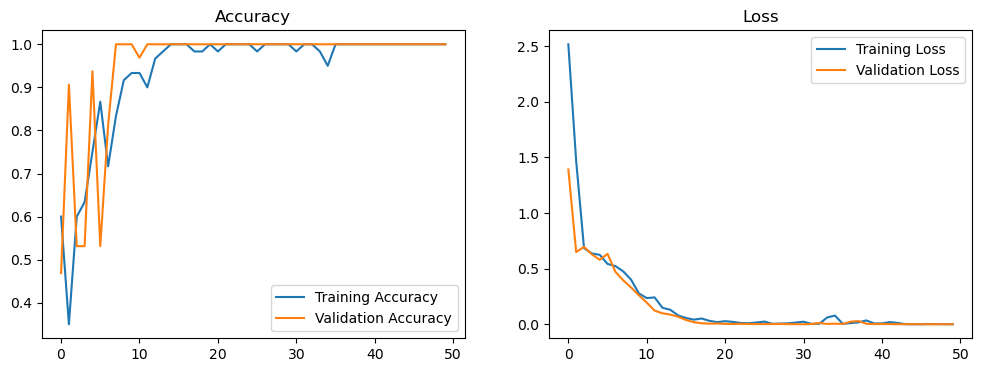

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Data Augmentation and Preparation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'train',  # Path to your training data directory
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    'test',  # Path to your testing data directory
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator
)

# Save the model
model.save('machine_anomaly_modelk.h5')
model.save('my_modelk.keras')

# Plotting accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [28]:
model.save('my_modelk.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Prediction: Good


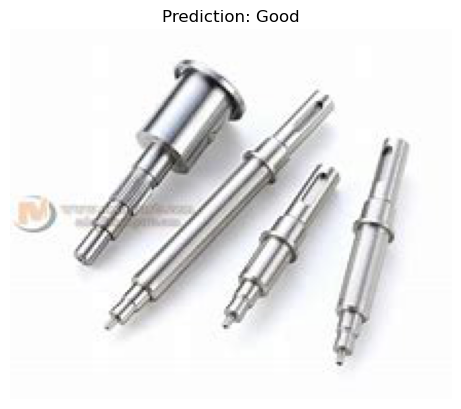

In [44]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('my_modelk.keras')

# Function to preprocess the image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(64, 64))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize
    return img_array

# Path to the image to be tested
image_path = 'train/good/picu 2.jpg'  # Update this path

# Preprocess the image
img_preprocessed = preprocess_image(image_path)

# Make prediction
prediction = model.predict(img_preprocessed)
label = "Faulty" if prediction[0][0] < 0.5 else "Good"

print(f"Prediction: {label}")

# Display the image and prediction
import matplotlib.pyplot as plt
img = load_img(image_path)
plt.imshow(img)
plt.title(f"Prediction: {label}")
plt.axis('off')
plt.show()
